<a href="https://colab.research.google.com/github/Mirzajamal750/Mirzajamal750/blob/main/KSEfprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install prophet
!pip install yfinance

     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640445 sha256=64c3bbe0335d34459a87f96118ec74c0331a16ed480048f07bfff770c4e93e48
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 62 kB 777 kB/s 
     |████████████████████████████████| 6.4 MB 11.3 M

In [4]:
from fbprophet import Prophet
import pandas as pd, matplotlib.pyplot as plt, yfinance as yf

In [8]:
df = yf.download('^KSE')

[*********************100%***********************]  1 of 1 completed


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-07-02,1592.859985,1618.150024,1590.020020,1618.150024,1618.150024,0
1997-07-03,1617.380005,1648.849976,1611.640015,1648.849976,1648.849976,0
1997-07-07,1673.890015,1698.760010,1673.890015,1691.680054,1691.680054,0
1997-07-08,1694.760010,1726.170044,1688.839966,1726.170044,1726.170044,0
1997-07-09,1727.109985,1786.050049,1710.560059,1778.510010,1778.510010,0
...,...,...,...,...,...,...
2021-08-31,47365.699219,47596.039062,47349.488281,47419.738281,47419.738281,0
2021-09-01,47419.738281,47628.589844,47355.140625,47413.460938,47413.460938,0
2021-09-02,47413.460938,47489.398438,46874.640625,46903.058594,46903.058594,0


In [11]:
df.reset_index(inplace = True)
df = df[['Date', 'Adj Close']]

In [12]:
df.columns = ['ds', 'y']

In [13]:
df

,ds,y
0,1997-07-02,1618.150024
1,1997-07-03,1648.849976
2,1997-07-07,1691.680054
3,1997-07-08,1726.170044
4,1997-07-09,1778.510010
...,...,...
5746,2021-08-31,47419.738281
5747,2021-09-01,47413.460938
5748,2021-09-02,46903.058594
5749,2021-09-03,46957.468750


In [14]:
model = Prophet()

In [15]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
df.tail()

,ds,y
5746,2021-08-31,47419.738281
5747,2021-09-01,47413.460938
5748,2021-09-02,46903.058594
5749,2021-09-03,46957.468750
5750,2021-09-30,44899.601562


In [18]:
future_dates = model.make_future_dataframe(periods= 60)

In [19]:
future_dates.tail()

,ds
5806,2021-11-25
5807,2021-11-26
5808,2021-11-27
5809,2021-11-28
5810,2021-11-29


In [20]:
prediction = model.predict(future_dates)

In [21]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5806,2021-11-25,39449.369935,36348.427772,42302.048577,39449.369935,39449.369935,-237.667098,-237.667098,-237.667098,30.344016,30.344016,30.344016,-268.011115,-268.011115,-268.011115,0.0,0.0,0.0,39211.702837
5807,2021-11-26,39447.571946,36270.134296,42336.021691,39447.571946,39447.571946,-231.351857,-231.351857,-231.351857,28.159202,28.159202,28.159202,-259.511058,-259.511058,-259.511058,0.0,0.0,0.0,39216.220089
5808,2021-11-27,39445.773956,35906.598300,42175.583711,39445.773956,39445.773956,-285.097964,-285.097964,-285.097964,-33.385537,-33.385537,-33.385537,-251.712427,-251.712427,-251.712427,0.0,0.0,0.0,39160.675993
5809,2021-11-28,39443.975967,36278.577045,42228.463361,39443.975967,39443.975967,-278.029050,-278.029050,-278.029050,-33.385536,-33.385536,-33.385536,-244.643514,-244.643514,-244.643514,0.0,0.0,0.0,39165.946917
5810,2021-11-29,39442.177978,36290.494615,42258.874156,39442.177978,39442.177978,-248.568725,-248.568725,-248.568725,-10.252666,-10.252666,-10.252666,-238.316060,-238.316060,-238.316060,0.0,0.0,0.0,39193.609252


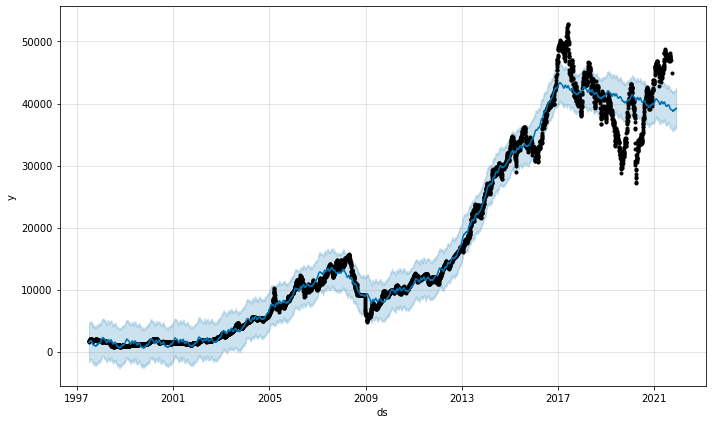

In [22]:
fig = model.plot(prediction)

In [23]:
from fbprophet.plot import plot_plotly
plot_plotly(model, prediction)

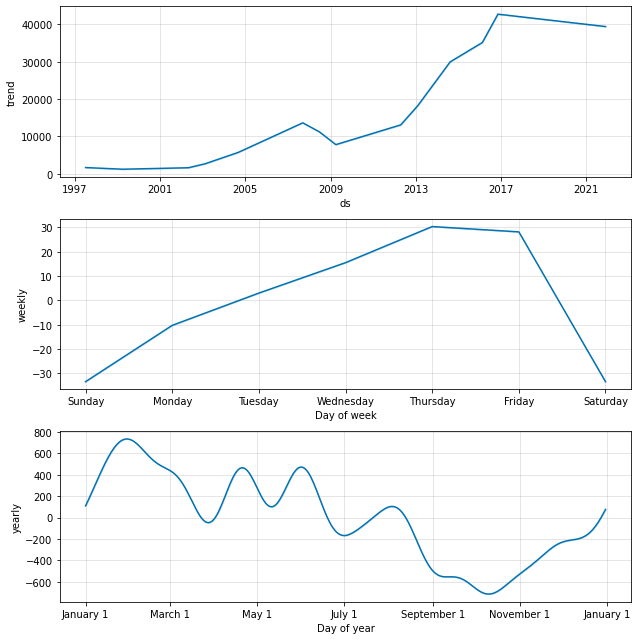

In [24]:
fig2 = model.plot_components(prediction)

In [25]:
from fbprophet.diagnostics import cross_validation

In [26]:
df_cv = cross_validation(model, horizon = '60 days')

INFO:fbprophet:Making 282 forecasts with cutoffs between 1998-07-03 00:00:00 and 2021-08-01 00:00:00


  0%|          | 0/282 [00:00<?, ?it/s]

In [27]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
11061,2021-08-31,38393.984577,35451.513081,41224.033774,47419.738281,2021-08-01
11062,2021-09-01,38414.850115,35354.552914,41358.143361,47413.460938,2021-08-01
11063,2021-09-02,38430.765931,35445.546435,41291.251392,46903.058594,2021-08-01
11064,2021-09-03,38432.349144,35329.032440,41474.867238,46957.468750,2021-08-01
11065,2021-09-30,38444.699491,35605.579546,41267.599227,44899.601562,2021-08-01


In [28]:
from fbprophet.diagnostics import performance_metrics

In [29]:
df_performance = performance_metrics(df_cv)

In [30]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,1.116484e+07,3341.383138,2166.192876,0.120987,0.090562,0.313861
1,8 days,1.131790e+07,3364.208185,2181.006278,0.123356,0.091441,0.309296
2,9 days,1.179471e+07,3434.342467,2232.099934,0.127026,0.093519,0.297101
3,10 days,1.192748e+07,3453.618219,2247.542565,0.129327,0.096410,0.287528
4,11 days,1.216814e+07,3488.286216,2276.628275,0.131490,0.097779,0.274317
5,12 days,1.217900e+07,3489.842768,2285.143340,0.132470,0.100430,0.265344
6,13 days,1.213599e+07,3483.674509,2291.283671,0.133252,0.101318,0.256545
7,14 days,1.219099e+07,3491.560215,2300.809852,0.134538,0.101087,0.250904
8,15 days,1.226037e+07,3501.481318,2305.288313,0.134940,0.100793,0.252270
9,16 days,1.262791e+07,3553.576475,2338.627936,0.136377,0.101381,0.251664


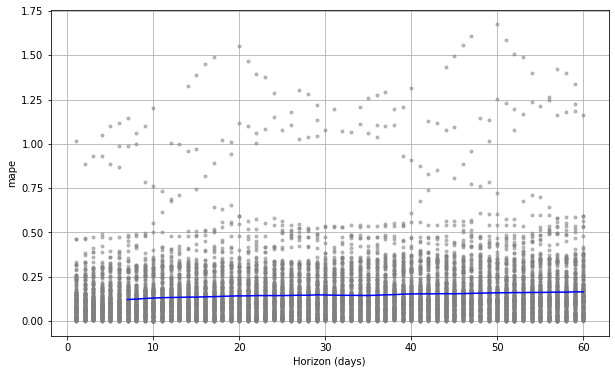

In [31]:
from fbprophet import plot

fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')